### <center><b>CREDIT CARD FRAUD DETECTION</b> </center>

<p><b>Online credit card fraud detection data involving customer data occurs when fraudsters access customer credit card information through various means, such as phishing, data breaches, or malware. They use this stolen information to make unauthorized transactions or steal identities.</b> </p>

In [341]:
#Importing necessary libraries

#Data manipulation
import pandas as pd 
# Algebra
import numpy as np 
# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns           

In [8]:
#Reading a csv file to dataframe
df=pd.read_csv("D:\\UPWORK\\Credit_card\\Final_dataset\\Base.csv")

In [9]:
#Displaying the dataframe
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [44]:
#checking for the null values
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [48]:
#Display the variable datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [50]:
#display the number of rows and columns
df.shape

(1000000, 32)

In [52]:
#checking for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [fraud_bool, income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount, payment_type, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, employment_status, credit_risk_score, email_is_free, housing_status, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit, foreign_request, source, session_length_in_minutes, device_os, keep_alive_session, device_distinct_emails_8w, device_fraud_count, month]
Index: []

[0 rows x 32 columns]


<p>To analyze credit card fraud data, we'll focus on three key hypotheses:

<b>1. Name-Email Mismatch: </b>Fraud is more likely if the email address doesn't match the customer's name.</br>
<b>2. Credit Limit: </b>Customers with higher credit limits are at greater risk of fraud.</br>
<b>3. Transaction frequency:</b> Higher transaction frequency are associated with a higher probability of fraud.</br>
We'll evaluate these hypotheses using data from continuous monitoring periods of 6 hours, 24 hours, and 6 weeks to uncover patterns and refine fraud detection strategies.</p></br>

In [280]:
df_new = df[['income','name_email_similarity','velocity_6h','velocity_24h','velocity_4w','credit_risk_score' ,'session_length_in_minutes','current_address_months_count','fraud_bool']]

In [281]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.0,0.562696,0.290343,0.100000,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,0.000001,0.225216,0.492153,0.755567,0.999999
velocity_6h,1000000.0,5665.296605,3009.380665,-170.603072,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.0,4769.781965,1479.212612,1300.307314,3593.179135,4749.921161,5752.574191,9506.896596
velocity_4w,1000000.0,4856.324016,919.843934,2825.748405,4268.368423,4913.436941,5488.083356,6994.764201
credit_risk_score,1000000.0,130.989595,69.681812,-170.000000,83.000000,122.000000,178.000000,389.000000
session_length_in_minutes,1000000.0,7.544940,8.033106,-1.000000,3.103053,5.114321,8.866131,85.899143
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000,19.000000,52.000000,130.000000,428.000000
fraud_bool,1000000.0,0.011029,0.104438,0.000000,0.000000,0.000000,0.000000,1.000000


<p><b>Result of the summary statistics of main hypothesis covered in this research: </b></br></br>
<b>1.name_email_similarity:</b>The mean value of the name_email_similarity</b>indicates moderate similarity between names and emails. Lower similarity scores may be associated with higher fraud risk. </br>
<b>2. velocity_6h,velocity_24h,velocity_4w: </b>The variable "velocity_6h,velocity_24h,velocity_4w" is a transaction timescale that was monitored. Higher velocities may indicate potential fraudulent activity.</br>
<b>3. proposed_credit_limit:</b> The variable "proposed_credit_limit" mean value is  515.85. Higher proposed credit limits are associated with greater chances of potential fraud risk.</br>
</p>
</p></br>

<p><b>Result of the summary statistics of supporting hypothesis covered in this research: </b></br></br>
<p><b>1. device_distinct_emails_8w:</b> The variable "device_distinct_emails_8w" mean value: 1.018312 indicates the device uses a single email address. The device consistently uses, a single email address indicates a standarad usage pattern. </p>
<p><b>2.device_fraud_count: </b> The variable "device_fraud_count" mean value of 0 and standarad deviation of 0 suggest that fraud was not recorded for the devices</p>
<p><b>3.has_other_cards: </b>The variable "has_other_cards" The mean value of 0.222988 suggests 22.3% of the customers have other cards.Customer with other cards are considered at higher risk of online fraud. </p>
<p><b>4.session_length_in_minutes </b> The variable "session_length_in_minutes" mean value 7.544940 indicates customer spent 7.5 minutes per session. The long session and short sessions are likely to be unusual </p>

In [12]:
df_new = df[['income','name_email_similarity','velocity_6h','velocity_24h','velocity_4w','credit_risk_score','proposed_credit_limit','device_distinct_emails_8w', 'has_other_cards','session_length_in_minutes']]

In [343]:
from scipy.stats import trim_mean
import scipy.stats as sts
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics
import warnings

mean_value = df['velocity_6h'].mean()
median_value = df['velocity_6h'].median()
mode_value= df['velocity_6h'].mode()
skewness= round(sts.skew(df['velocity_6h'], axis = 0, bias = True),2)
kurtosis = round(sts.kurtosis(df['velocity_6h'], axis = 0, fisher = 0, bias = True),2)
IQR = round(sts.iqr(df['velocity_6h'], axis = 0, rng=(25,75)),2)
lower_bound = df['velocity_6h'].quantile(0.25) - 1.5 * IQR
upper_bound = df['velocity_6h'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['velocity_6h'] < lower_bound) | (df['velocity_6h'] > upper_bound)].shape[0]

trim_propotion= 0.1
trimmed_mean= trim_mean(df['velocity_6h'],trim_propotion)
print(f'Mean:{mean_value}')
print(f'Median value:{median_value}')
print(f'Mode:{mode_value}')
print(f'Trimmed mean:{trimmed_mean}')
print(f'Skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:5665.2966047952705
Median value:5319.769349162381
Mode:0         170.518208
1         371.240955
2         588.145508
3         615.208731
4         630.716002
            ...     
1308    14782.988259
1309    14991.053837
1310    15055.517966
1311    15079.634462
1312    15553.423150
Name: velocity_6h, Length: 1313, dtype: float64
Trimmed mean:5483.537948650075
Skewness:0.56
kurtosis:3.0
IQR:4244.35
Outlier:9005


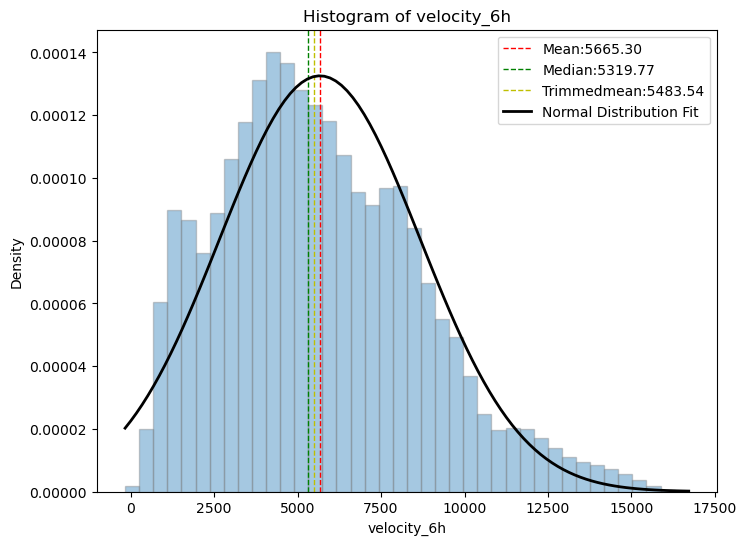

In [16]:
#figure size
plt.rcParams['figure.figsize'] = (8, 6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df['velocity_6h'],bins=40,density=True)
plt.hist(df['velocity_6h'], bins=40, density=True, edgecolor='grey', alpha=0.4)

plt.axvline(mean_value, color='r', linestyle='dashed',linewidth=1, label= f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label= f'Median:{ median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label= f'Trimmedmean:{trimmed_mean:.2f}')

mn,std = sts.norm.fit(df['velocity_6h'])

# Generate x values for the normal distribution curve
x_bin = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate normal distribution curve
y_curve = sts.norm.pdf(x_bin, mn, std)

# Plot normal distribution curve
plt.plot(x_bin, y_curve, 'k', linewidth=2, label='Normal Distribution Fit')

# Add labels, title, and legend
plt.xlabel('velocity_6h')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of velocity_6h')

# Show plot
plt.show()

##### The observation for the variable : Velocity (6 hours)

The mean value suggests 5665.29, the average number of transactions made during the 6 hours. </br>
The median value suggests 5319.76, half of the transactions are below the median. </br>
The trimmed mean suggests 5483.54, by removing the extreme transaction counts, which makes it closer to the median. </br>
The IQR suggests 4244.35, the many high transactions are in the middle half, and people activity varies a lot. </br>

Skewness: 0.56 is a moderate positive skew </br>
Kurtosis: 3.0 that is close to normal          </br>
Conclusion: Not normally distributed due to positive skewness.    </br>



<Axes: title={'center': 'Boxplot of velocity_6h'}>

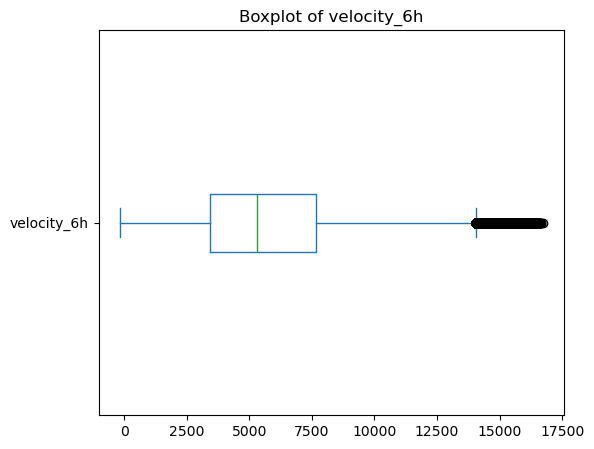

In [19]:
#boxplot for the variable "velocity_6h"
plt.rcParams['figure.figsize']=(6,5)
df['velocity_6h'].plot(kind='box', vert=False, title='Boxplot of velocity_6h')


<p>The box plot suggests that the whisker of the box is long on the right-hand side and suggests distribution is skewed because of the high transaction count.</p>

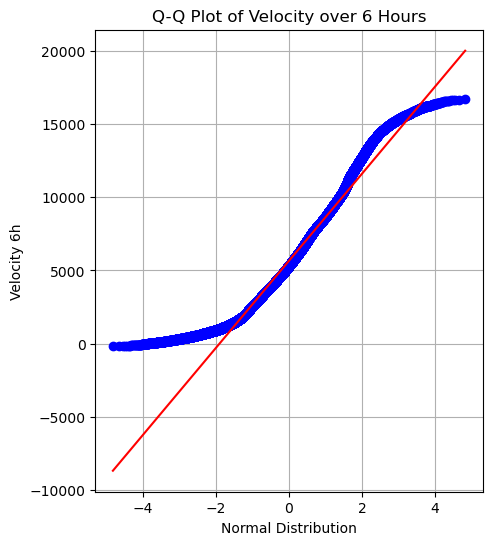

In [22]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_6h'],dist="norm",plot=plt)
plt.title('Q-Q Plot of Velocity over 6 Hours')
plt.xlabel('Normal Distribution')
plt.ylabel('Velocity 6h')
plt.grid()
plt.show()

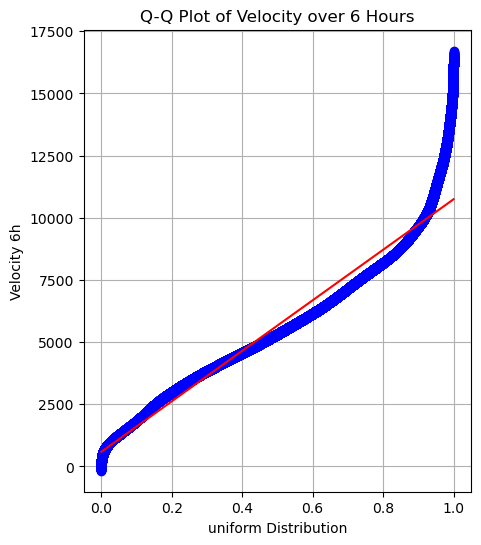

In [207]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_6h'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of Velocity over 6 Hours')
plt.xlabel('uniform Distribution')
plt.ylabel('Velocity 6h')
plt.grid()
plt.show()

In [66]:
from scipy.stats import kstest

mu = df['velocity_6h'].mean() 
sigma = df['velocity_6h'].std()  
a = df['velocity_6h'].min()
b = df['velocity_6h'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['velocity_6h'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['velocity_6h'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.0468629549342508, P-value: 0.0
Uniform Distribution K-S Statistic: 0.31593852418523705, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p> By observing the histogram, box-plot we identified the variable "velocity_6h" is not normally distributed due to its positive skewness. By observing the Q-Q plots
for normal and uniform distribution. it states that the data is not confirmed either normal or uniform distribution after the visual inspection. so, the Kolmogorov-Smirnov test was performed and it also clearly
says that a p-value < 0.05 indicates that the null hypothesis is rejected. The p-value for the Kolmogorov-Smirnov test for normal and uniform is 0 and hence it's either not normal or uniform distribution. So going forward,to bring the data points closer we can transform the variable by logarithmic or square root transformation. </p>
</br>

In [68]:
mean_vale=df['velocity_24h'].mean()
median_value=df['velocity_24h'].median()
mode_value=df['velocity_24h'].mode()
trim_propotion=0.1
trimmed_mean=trim_mean(df['velocity_24h'],trim_propotion)
skewness = round(sts.skew(df['velocity_24h'],bias=True),2)
kurtosis = round(sts.kurtosis(df['velocity_24h'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['velocity_24h'],axis=0, rng=(25,75)),2)

lower_bound = df['velocity_24h'].quantile(0.25) - 1.5 * IQR
upper_bound = df['velocity_24h'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['velocity_24h'] < lower_bound) | (df['velocity_24h'] > upper_bound)].shape[0]


print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'Trimmed_mean:{trimmed_mean}')
print(f' Skewness:{skewness}')
print(f' kurtosis:{kurtosis}')
print(f' IQR:{IQR}')
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"outliers_count:{outliers_count}")


Mean:5665.2966047952705
Median:4749.9211611050905
Mode:0    3906.416302
1    4667.863854
2    5082.326632
3    6676.201310
Name: velocity_24h, dtype: float64
Trimmed_mean:4710.316760940578
 Skewness:0.33
 kurtosis:2.63
 IQR:2159.4
Lower Bound: 354.07913456933693
Upper Bound: 8991.67419067895
outliers_count:2917


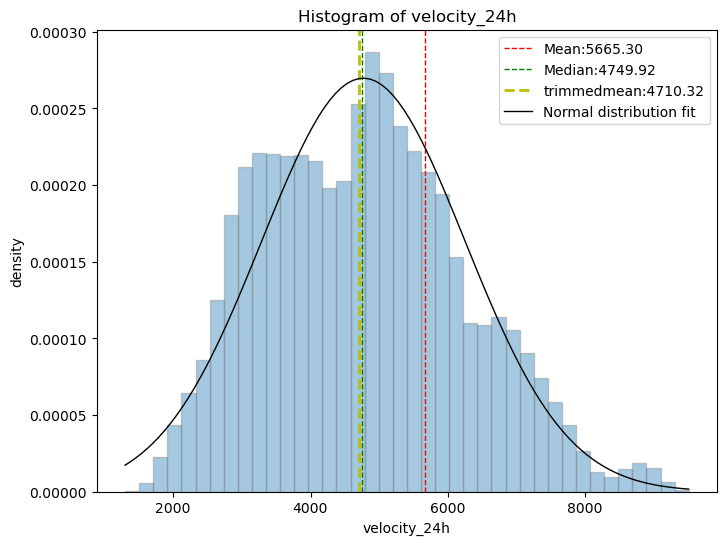

In [70]:
#figure size
plt.rcParams['figure.figsize']=(8,6)

#specifying histogram and bins
hist,bin_edges = np.histogram(df['velocity_24h'],bins=40,density=True)
plt.hist(df['velocity_24h'], bins=40, density=True, edgecolor='grey', alpha=0.4)
plt.axvline(mean_value,color='r',linestyle='dashed',linewidth=1,label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=2,label=f'trimmedmean:{trimmed_mean:.2f}')
mn,std = sts.norm.fit(df['velocity_24h'])

# Generate x values for the normal distribution curve
x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)

# Calculate normal distribution curve
y_curve= sts.norm.pdf(x_bin,mn,std)

# Plot normal distribution curve
plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')

# Add labels, title, and legend
plt.xlabel('velocity_24h')
plt.ylabel('density')
plt.legend()
plt.title('Histogram of velocity_24h')
plt.show()

##### The observation for the variable: Velocity (24 hours)
The mean value is 5665.30, which suggests the value is the average number of transactions made during 24 hours. </br>
The median value is 5319.77, which suggests that half of the transactions are below the median value. </br>
The trimmed mean value is 5483.54, which suggests that removing the extreme transaction counts, makes it closer to the median.  </br>
The IQR value is 2159.4, which suggests that there are wide transactions in the middle range, which means noticeable high or low transactions.

Skewness: 0.33 slight positive skew </br>Kurtosis: 2.63 platykurtic, less peaked	 </br>
Conclusion: normal but slightly skewed.</br>




<Axes: title={'center': 'Boxplot of velocity_24h'}>

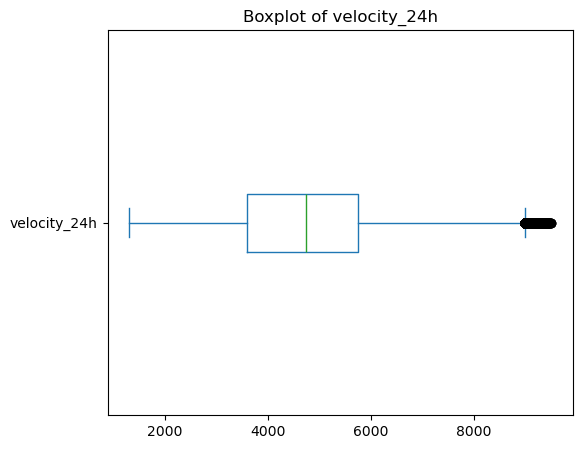

In [72]:
#boxplot for the variable "velocity_24h"
plt.rcParams['figure.figsize']=(6,5)
df['velocity_24h'].plot(kind='box', vert=False, title='Boxplot of velocity_24h')

<p> The box plot of the whisker is mildly high on the right-hand side and suggest the transaction counts made during 24 hours are slightly high. </p>

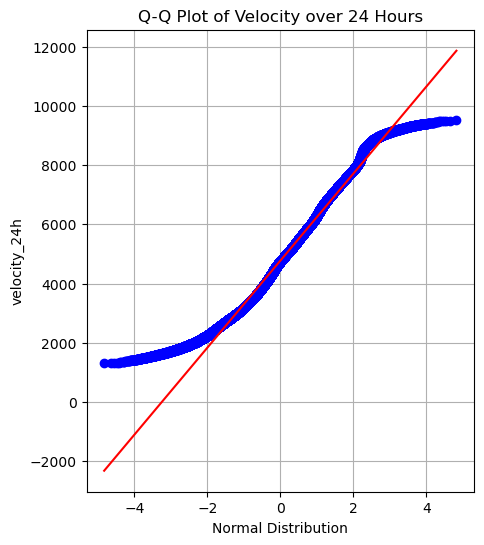

In [74]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_24h'],dist="norm",plot=plt)
plt.title('Q-Q Plot of Velocity over 24 Hours')
plt.xlabel('Normal Distribution')
plt.ylabel('velocity_24h')
plt.grid()
plt.show()

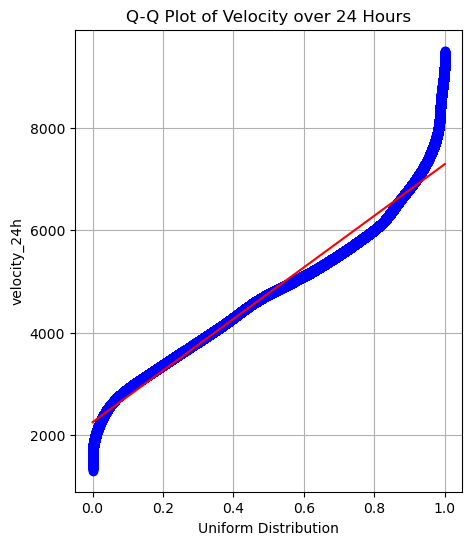

In [90]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_24h'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of Velocity over 24 Hours')
plt.xlabel('Uniform Distribution')
plt.ylabel('velocity_24h')
plt.grid()
plt.show()

In [101]:
from scipy.stats import kstest

mu = df['velocity_24h'].mean() 
sigma = df['velocity_24h'].std()  
a = df['velocity_24h'].min()
b = df['velocity_24h'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['velocity_24h'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['velocity_24h'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.03951763507253031, P-value: 0.0
Uniform Distribution K-S Statistic: 0.319862529882858, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p> By observing the histogram and the box plot we identified the variable "velocity_24h" looks normal but slightly positively skewed. Q-Q plots are used to check the data distribution for a detailed normality check. Visual inspection of the q-q plot suggests the data points fit on the reference line uniformly compared to normal distribution. Further test was needed to confirm the normality check  so, the Kolmogorov-Smirnov test was performed and it also clearly says that a p-value < 0.05 indicates that the null hypothesis is rejected. The p-value for the Kolmogorov-Smirnov test for normal and uniform is 0 and hence it's either not normal or uniform distribution. So going forward,to bring the data points closer we can transform the variable by logarithmic or square root transformation.
</p>
</br>

Mean:4856.324015811875
Median:4913.436940627085
Mode:0    4297.664858
1    5466.870949
Name: velocity_4w, dtype: float64
skewness:-0.06
kurtosis:2.64
IQR:1219.71
Outlier:52281


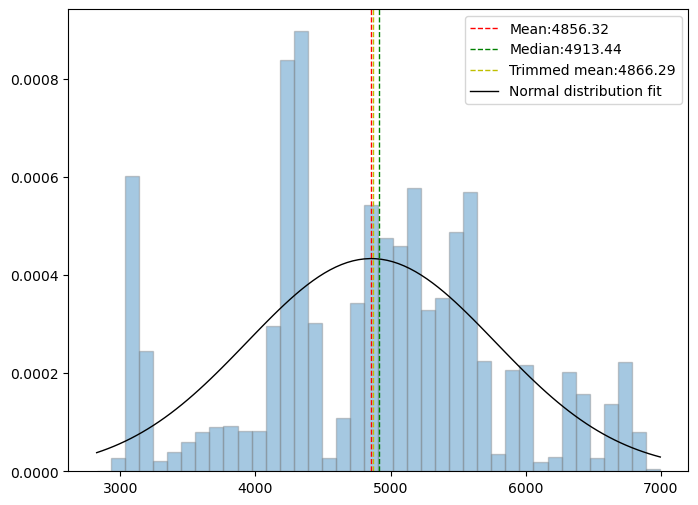

In [24]:
mean_value= df['velocity_4w'].mean()
median_value=df['velocity_4w'].median()
mode_value=df['velocity_4w'].mode()
mean_propotion= 0.1
trimmed_mean=trim_mean(df['velocity_4w'],mean_propotion)
skewness = round(sts.skew(df['velocity_4w'],bias=True),2)
kurtosis = round(sts.kurtosis(df['velocity_4w'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['velocity_4w'],axis=0, rng=(25,75)),2)
lower_bound = df['velocity_4w'].quantile(0.25) - 1.5 * IQR
upper_bound = df['velocity_4w'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['velocity_4w'] < lower_bound) | (df['velocity_24h'] > upper_bound)].shape[0]

print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')


plt.rcParams['figure.figsize']=(8,6)
hist,bin_edges = np.histogram(df['velocity_4w'],bins=40,density=True)
plt.hist(df['velocity_4w'],bins=40,edgecolor='grey',alpha=0.4,density=True)
plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['velocity_4w'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.legend()
plt.show()


##### The observation for the variable: Velocity (4 weeks)

The mean value is 4856.32, which suggests the value is the average number of transactions made during 24 hours over 4 weeks. it indicates strong activity.</br>
The median value is 4913.44, which suggests that half of the transactions are below the median value.</br>
The trimmed mean value is 4866.29, which suggests that removing the extreme transaction counts, makes it closer to the median. By reducing the outlier, the accurate mean by extreme values.</br>
The IQR value is 1219.71, which suggests that there are wide transactions in the middle range, which means noticeable high or low transactions.</br>

Skewness: -0.06 symmetric</br>
Kurtosis: 2.64 platykurtic</br>
Conclusion: Likely normally distributed and very slight negative skew. </br>


<Axes: title={'center': 'Boxplot of velocity_4w'}>

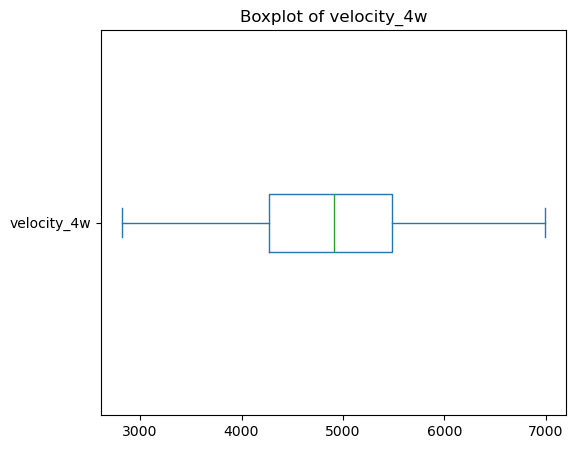

In [27]:
#boxplot for the variable "velocity_4w"
plt.rcParams['figure.figsize']=(6,5)
df['velocity_4w'].plot(kind='box', vert=False, title='Boxplot of velocity_4w')

<p>The box plot for the variable looks normally distributed. The whisker of the boxes are on same length on both the sides. </p>

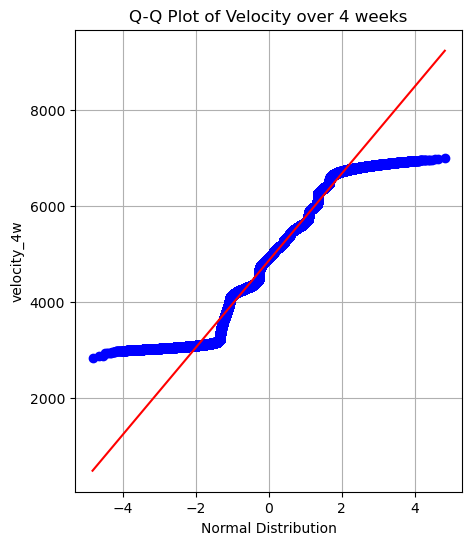

In [30]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_4w'],dist="norm",plot=plt)
plt.title('Q-Q Plot of Velocity over 4 weeks')
plt.xlabel('Normal Distribution')
plt.ylabel('velocity_4w')
plt.grid()
plt.show()

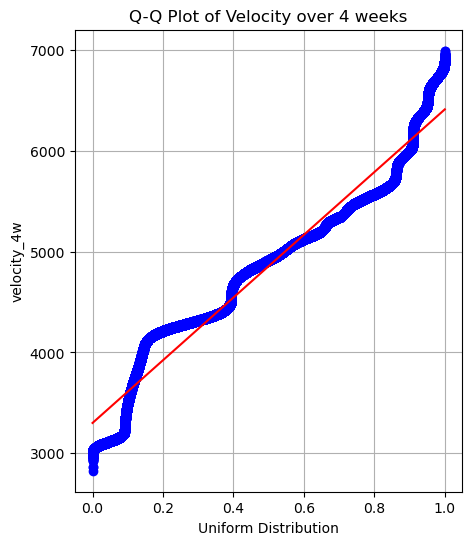

In [32]:
plt.figure(figsize=(5, 6))
sts.probplot(df['velocity_4w'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of Velocity over 4 weeks')
plt.xlabel('Uniform Distribution')
plt.ylabel('velocity_4w')
plt.grid()
plt.show()

In [216]:
from scipy.stats import kstest

mu = df['velocity_4w'].mean() 
sigma = df['velocity_4w'].std()  
a = df['velocity_4w'].min()
b = df['velocity_4w'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['velocity_4w'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['velocity_4w'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.05845419966641463, P-value: 0.0
Uniform Distribution K-S Statistic: 0.4474567795727364, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b> <p> By observing the histogram and the box plot we identified the variable "velocity_4w" looks normal but slightly skewed whereas in box plots, the whisker of box are evenly distributed stating a normal distribution. To confirm, Q-Q plots are used to check the data distribution for a detailed normality check. Visual inspection of the q-q plot suggests the data points fit on the reference line uniformly compared to normal distribution. Further test was needed to confirm the normality check  so, the Kolmogorov-Smirnov test was performed and it also clearly says that a p-value < 0.05 indicates that the null hypothesis is rejected. The p-value for the Kolmogorov-Smirnov test for normal and uniform is 0 and hence it's either not normal or uniform distribution. So going forward,to bring the data points closer we can transform the variable by logarithmic or square root transformation.
</p>
</br>

In [42]:
#name_email_similarity
mean_value=df['name_email_similarity'].mean()
median_value=df['name_email_similarity'].median()
mode_value=df['name_email_similarity'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['name_email_similarity'],mean_propotion)
skewness = round(sts.skew(df['name_email_similarity'],bias=True),2)
kurtosis = round(sts.kurtosis(df['name_email_similarity'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['name_email_similarity'],axis=0, rng=(25,75)),2)
lower_bound = df['name_email_similarity'].quantile(0.25) - 1.5 * IQR
upper_bound = df['name_email_similarity'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['name_email_similarity'] < lower_bound) | (df['velocity_6h'] > upper_bound)].shape[0]


print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')
print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:0.4936940949631276
Median:0.4921525275151668
Mode:0       0.004070
1       0.006597
2       0.009115
3       0.009765
4       0.010534
          ...   
1134    0.996974
1135    0.997060
1136    0.997237
1137    0.997429
1138    0.997653
Name: name_email_similarity, Length: 1139, dtype: float64
trimmed mean:0.4919058788711064
skewness:0.04
kurtosis:1.72
IQR:0.53
Outlier:999954


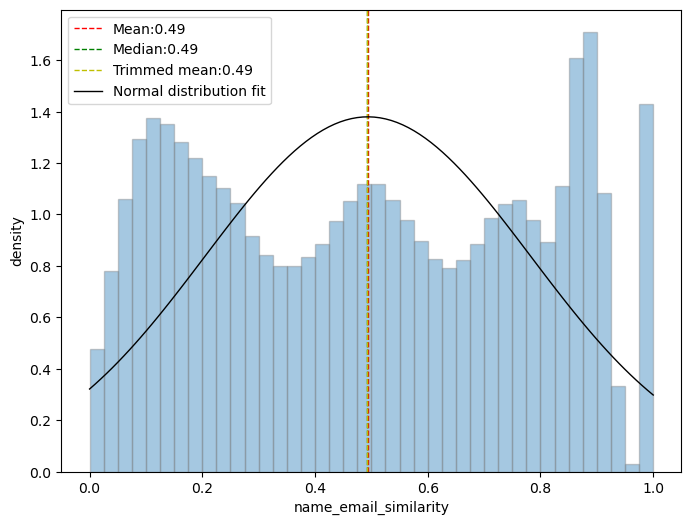

In [44]:
plt.rcParams['figure.figsize']=(8,6)
hist,bin_edges = np.histogram(df['name_email_similarity'],bins=40,density=True)
plt.hist(df['name_email_similarity'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['name_email_similarity'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('name_email_similarity')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: name_email_similarity
The mean value is 0.49, suggesting a moderate similarity between the name and email.  </br>
The median value is 0.49, suggesting the same value as the mean. This means there is a balanced symmetric distribution. </br>
The trimmed mean value is 0.49, suggesting the same value as the mean and median, indicating no anomalies.  </br>
The IQR value is 0.53, suggesting the value is greater than the mean, and the median indicates some outliers are present that are not affecting the IQR. The distribution is not skewed</br>

Skewness: 0.04 approximately symmetric</br>
	Kurtosis: 1.7 (playkurtic</br>
Conclusion: Likely normally distributed; symmetric </b>.


<Axes: title={'center': 'Boxplot of name_email_similarity'}>

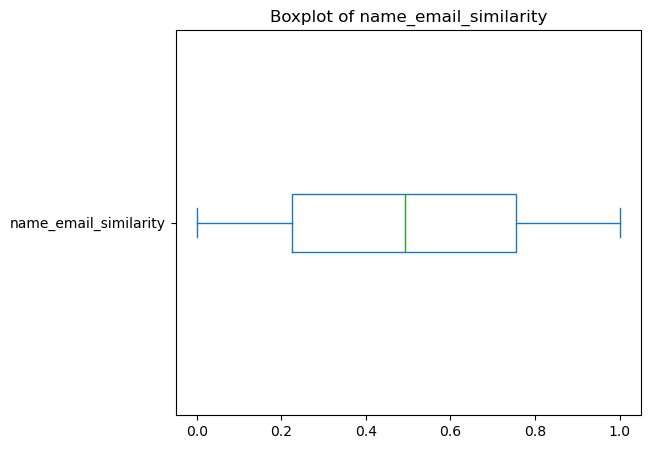

In [47]:
#boxplot for the variable "name_email_similarity"
plt.rcParams['figure.figsize']=(6,5)
df['name_email_similarity'].plot(kind='box', vert=False, title='Boxplot of name_email_similarity')

<p>The box plot for the variable looks normally distributed. The whisker of the boxes are on same length on both the sides. </p>

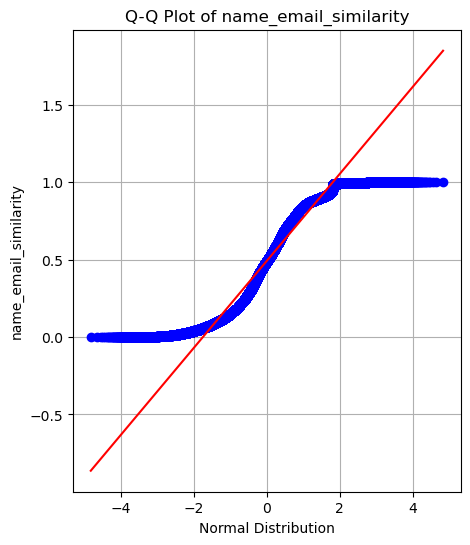

In [49]:
plt.figure(figsize=(5, 6))
sts.probplot(df['name_email_similarity'],dist="norm",plot=plt)
plt.title('Q-Q Plot of name_email_similarity')
plt.xlabel('Normal Distribution')
plt.ylabel('name_email_similarity')
plt.grid()
plt.show()

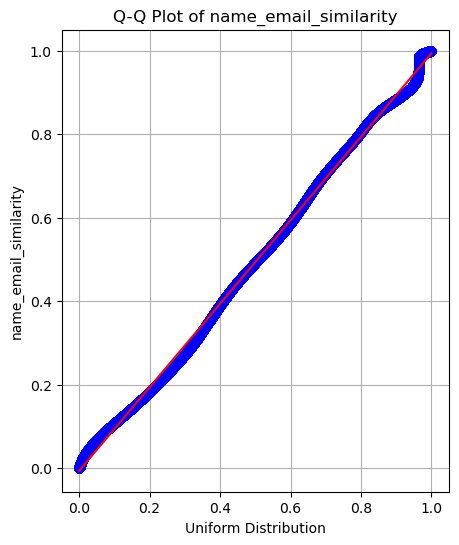

In [53]:
plt.figure(figsize=(5, 6))
sts.probplot(df['name_email_similarity'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of name_email_similarity')
plt.xlabel('Uniform Distribution')
plt.ylabel('name_email_similarity')
plt.grid()
plt.show()

In [220]:
from scipy.stats import kstest

mu = df['name_email_similarity'].mean() 
sigma = df['name_email_similarity'].std()  
a = df['name_email_similarity'].min()
b = df['name_email_similarity'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['name_email_similarity'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['name_email_similarity'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.07872165102654188, P-value: 0.0
Uniform Distribution K-S Statistic: 0.032070320810341446, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "name_email_similarity" likely normally distributed and symmetric and the box plot suggests, that the whisker of both ends are the same length, looks normally distributed. For further investigation, performed Q-Q plots, visual inspection of Q-Q plots for normal and uniform distribution, data points fit well on reference line for uniform distribution. Due to the conflict evidence, </br> 

1. Q-Q suggests uniform distribution. </br>

2. Histogram and box plot suggest normal distribution and finally, on the KS test, the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution but smaller KS Score compared to normal, the data is much closer to the uniform distribution. </p>

In [77]:
#session_length_in_minutes
mean_value=df['session_length_in_minutes'].mean()
median_value=df['session_length_in_minutes'].median()
mode_value=df['session_length_in_minutes'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['session_length_in_minutes'],mean_propotion)

skewness = round(sts.skew(df['session_length_in_minutes'],bias=True),2)
kurtosis = round(sts.kurtosis(df['session_length_in_minutes'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['session_length_in_minutes'],axis=0, rng=(25,75)),2)
lower_bound = df['session_length_in_minutes'].quantile(0.25) - 1.5 * IQR
upper_bound = df['session_length_in_minutes'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['session_length_in_minutes'] < lower_bound) | (df['session_length_in_minutes'] > upper_bound)].shape[0]


print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')

print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')


Mean:7.544940201289997
Median:5.114321329246575
Mode:0   -1.0
Name: session_length_in_minutes, dtype: float64
trimmed mean:5.982014078419061
skewness:3.3
kurtosis:17.96
IQR:5.76
Outlier:78837


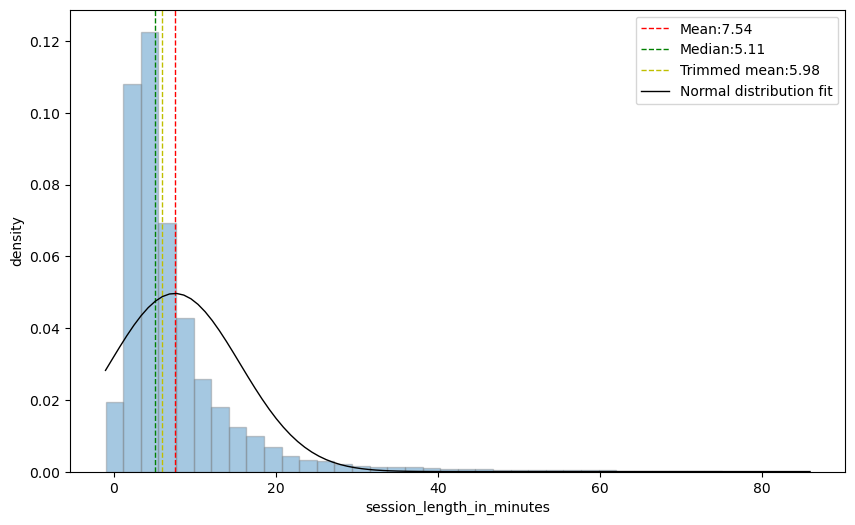

In [79]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['session_length_in_minutes'],bins=40,density=True)
plt.hist(df['session_length_in_minutes'],bins=40,edgecolor='grey',alpha=0.4,density=True)


plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['session_length_in_minutes'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('session_length_in_minutes')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: session_length_in_minutes
The mean value is 7.54, suggesting an average duration of the session of the user engaged during the transaction. </br>
The median value is 5.11, suggesting half of the session lengths are below this median value, which indicates a right skew.</br>
The trimmed mean value is 5.98, suggesting removing the extreme points closer to the median value indicates anomalies not affecting the measures of central tendency. </br>
The IQR value is 5.76, suggesting that IQR is greater than the mean and median values where the anomalies don't affect the IQR range. The distribution is skewed.</br>

Skewness: 3.3 strong positive skew </br>	Kurtosis:17.96 (hig and indicates  heavy tail. </br>
Conclusion: not normally distributed; right-skewed


<Axes: title={'center': 'Boxplot of session_length_in_minutes'}>

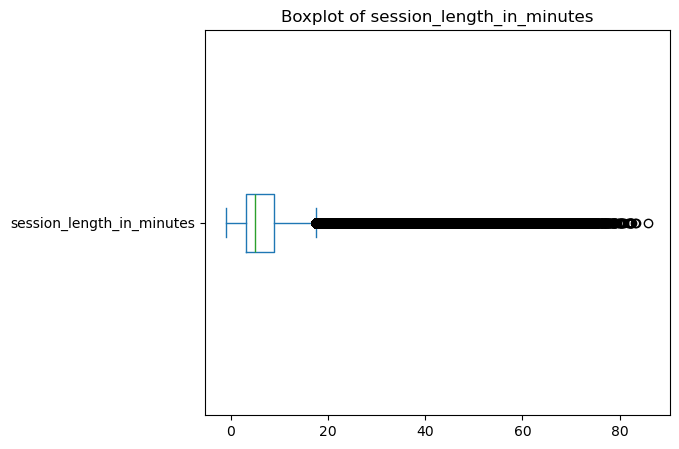

In [82]:
#boxplot for the variable "session_length_in_minutes"
plt.rcParams['figure.figsize']=(6,5)
df['session_length_in_minutes'].plot(kind='box', vert=False, title='Boxplot of session_length_in_minutes')

<p>The box plot for the variable looks right-skewed. The right-hand side of the whisker looks larger suggesting the presence of outliers. </p>

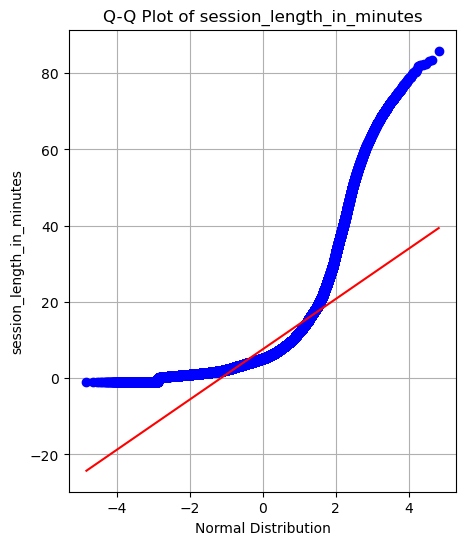

In [85]:
plt.figure(figsize=(5, 6))
sts.probplot(df['session_length_in_minutes'],dist="norm",plot=plt)
plt.title('Q-Q Plot of session_length_in_minutes')
plt.xlabel('Normal Distribution')
plt.ylabel('session_length_in_minutes')
plt.grid()
plt.show()

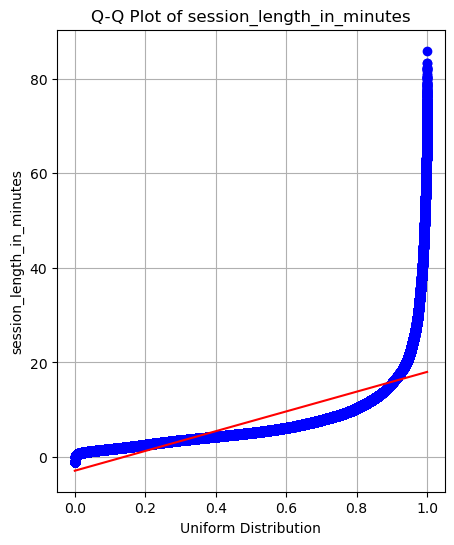

In [87]:
plt.figure(figsize=(5, 6))
sts.probplot(df['session_length_in_minutes'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of session_length_in_minutes')
plt.xlabel('Uniform Distribution')
plt.ylabel('session_length_in_minutes')
plt.grid()
plt.show()

In [115]:
from scipy.stats import kstest

mu = df['session_length_in_minutes'].mean() 
sigma = df['session_length_in_minutes'].std()  
a = df['session_length_in_minutes'].min()
b = df['session_length_in_minutes'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['session_length_in_minutes'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['session_length_in_minutes'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.18707171044722204, P-value: 0.0
Uniform Distribution K-S Statistic: 0.7069797399879942, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "session_length_in_minutes". The visual inspection by histogram says the data is not normally distributed, box plot suggests the data are right-skewed. 
Further investigation suggests </br>
1. Q-Q plots: The visual inspection of Q-Q plots for both (normal and uniform) says it's not either normal or uniform due to data points not fit well within the reference line. </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution but the smaller K-S statistic for the normal distribution suggests that while neither distribution fits well, the data is somewhat closer to a uniform distribution.

To bring the data points closer, further investigation needed like logarithmic or square root transformation

In [93]:
#credit_risk_score
mean_value=df['credit_risk_score'].mean()
median_value=df['credit_risk_score'].median()
mode_value=df['credit_risk_score'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['credit_risk_score'],mean_propotion)

skewness = round(sts.skew(df['credit_risk_score'],bias=True),2)
kurtosis = round(sts.kurtosis(df['credit_risk_score'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['credit_risk_score'],axis=0, rng=(25,75)),2)
lower_bound = df['credit_risk_score'].quantile(0.25) - 1.5 * IQR
upper_bound = df['credit_risk_score'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['credit_risk_score'] < lower_bound) | (df['credit_risk_score'] > upper_bound)].shape[0]

print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')

print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:130.989595
Median:122.0
Mode:0    113
Name: credit_risk_score, dtype: int64
trimmed mean:128.49456875
skewness:0.3
kurtosis:3.07
IQR:95.0
Outlier:8729


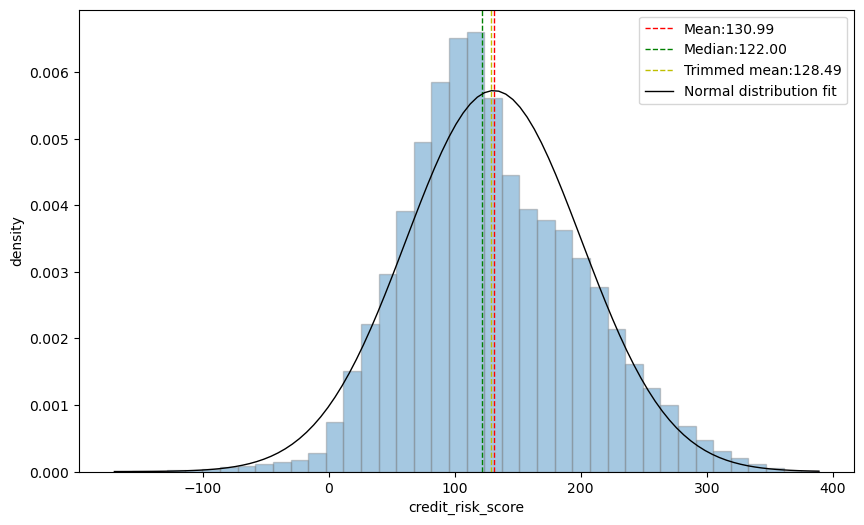

In [95]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['credit_risk_score'],bins=40,density=True)
plt.hist(df['credit_risk_score'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['credit_risk_score'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('credit_risk_score')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: credit risk scores
The mean value is 130.99, suggesting an average value of the credit risk scores of the users. </br>
The median value is 122, suggesting half of the  credit risk scores are below this median value, which indicates a slight right skew.</br>
The trimmed mean value is 5.98, suggesting removing the extreme points closer to the mean value indicates anomalies affecting the measures of central tendency. </br>
The IQR value is 95.0, suggesting that IQR is lesser than the mean and median values where the anomalies/outliers present and influence the overall data spread. The distribution is skewed.</br>

Skewness: 0.3 slight positive skew </br>
Kurtosis: 3.07 close to normal </br>
Conclusion: likely normally distributed; slight right-skewed </br>

<Axes: title={'center': 'Boxplot of credit_risk_score'}>

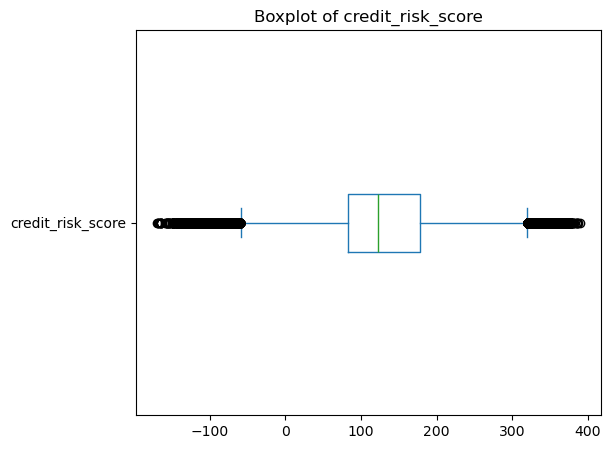

In [98]:
#boxplot for the variable "credit_risk_score"
plt.rcParams['figure.figsize']=(6,5)
df['credit_risk_score'].plot(kind='box', vert=False, title='Boxplot of credit_risk_score')

<p>The box plot for the variable looks  slightly right-skewed. The right-hand side of the whisker looks larger likely right-skewed. </p>

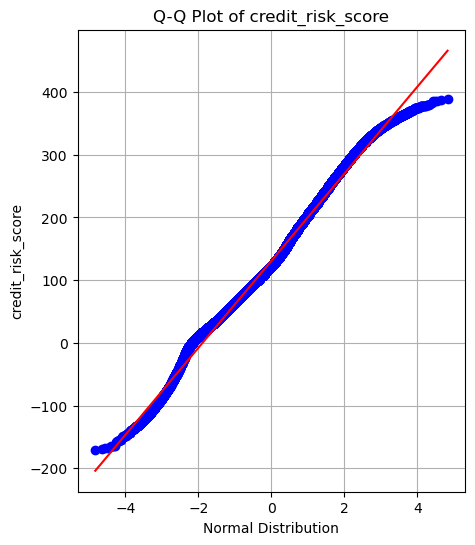

In [103]:
plt.figure(figsize=(5, 6))
sts.probplot(df['credit_risk_score'],dist="norm",plot=plt)
plt.title('Q-Q Plot of credit_risk_score')
plt.xlabel('Normal Distribution')
plt.ylabel('credit_risk_score')
plt.grid()
plt.show()

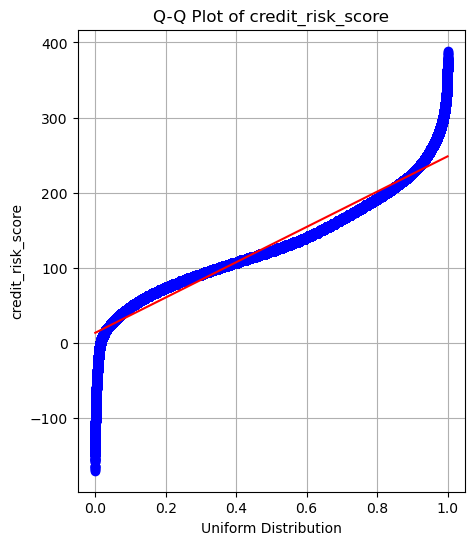

In [113]:
plt.figure(figsize=(5, 6))
sts.probplot(df['credit_risk_score'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of credit_risk_score')
plt.xlabel('Uniform Distribution')
plt.ylabel('credit_risk_score')
plt.grid()
plt.show()

In [119]:
from scipy.stats import kstest

mu = df['credit_risk_score'].mean() 
sigma = df['credit_risk_score'].std()  
a = df['credit_risk_score'].min()
b = df['credit_risk_score'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['credit_risk_score'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['credit_risk_score'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.054118438398960966, P-value: 0.0
Uniform Distribution K-S Statistic: 0.46365906426735215, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "credit_risk_score". The visual inspection by histogram says the data is likely normally distributed and slight skewed, box plot suggests the data are right-skewed. 
Further investigation suggests </br>

1. Q-Q plots: The visual inspection of Q-Q plots for normal, shows telltale visualization at both ends of the normal Q-Q plot, Whereas in the uniform there is a slight where data points are not closer.  </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution while both distributions were rejected.  </br>

To bring the data points closer, further investigation needed like logarithmic or square root transformation

In [139]:
#proposed_credit_limit
mean_value=df['proposed_credit_limit'].mean()
median_value=df['proposed_credit_limit'].median()
mode_value=df['proposed_credit_limit'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['proposed_credit_limit'],mean_propotion)

skewness = round(sts.skew(df['proposed_credit_limit'],bias=True),2)
kurtosis = round(sts.kurtosis(df['proposed_credit_limit'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['proposed_credit_limit'],axis=0, rng=(25,75)),2)

lower_bound = df['proposed_credit_limit'].quantile(0.25) - 1.5 * IQR
upper_bound = df['proposed_credit_limit'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['proposed_credit_limit'] < lower_bound) | (df['proposed_credit_limit'] > upper_bound)].shape[0]


print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')

print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:515.85101
Median:200.0
Mode:0    200.0
Name: proposed_credit_limit, dtype: float64
trimmed mean:428.2688
skewness:1.3
kurtosis:3.17
IQR:300.0
Outlier:241742


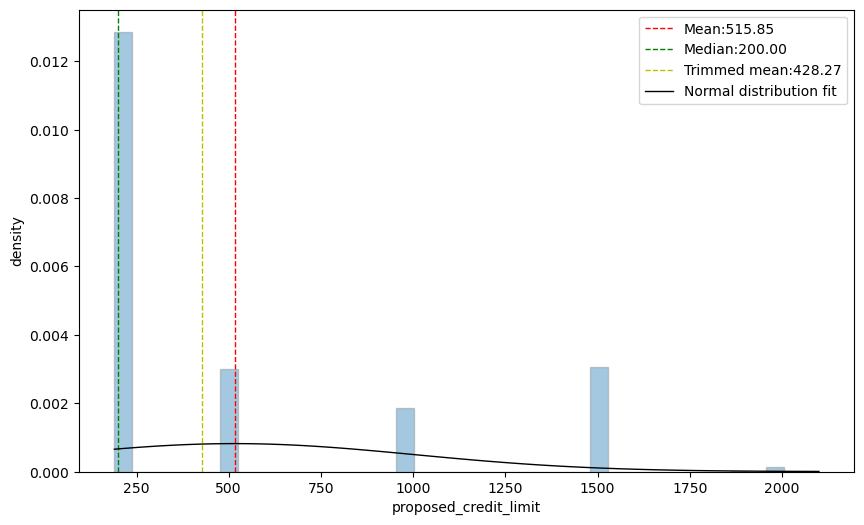

In [127]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['proposed_credit_limit'],bins=40,density=True)
plt.hist(df['proposed_credit_limit'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['proposed_credit_limit'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('proposed_credit_limit')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: proposed credit_limit
The mean value is 515.85, suggesting an average value of the proposed credit limit of the users.</br>
The median value is 200, suggesting half of the credit limit of the users falls below the median value .</br>
The trimmed mean value is 428.27, suggesting removing the extreme points closer to the mean value indicates anomalies affecting the measures of central tendency. </br>
The IQR value is 300, suggesting that IQR is lesser than the mean and greater than the median values where many users have lower limits that are notable outliers with much higher limits which influence the spread of the data. The distribution is skewed.</br>

Skewness: 1.3 moderate positive skew </br>
Kurtosis: 3.17 close to normal </br>
Conclusion: likely normally distributed; slight right-skewed </br>

<Axes: title={'center': 'Boxplot of proposed_credit_limit'}>

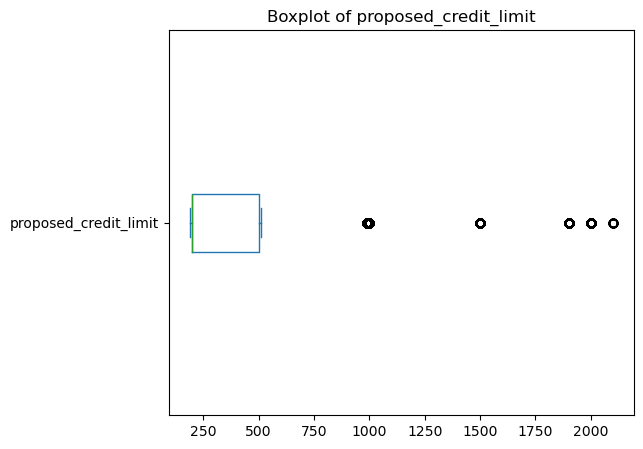

In [130]:
#boxplot for the variable "proposed_credit_limit"
plt.rcParams['figure.figsize']=(6,5)
df['proposed_credit_limit'].plot(kind='box', vert=False, title='Boxplot of proposed_credit_limit')

<p> The box plot of the whisker is very minute at both ends suggests,the data points are clustered with in the median and few outliers are present indicates the variability.</p>

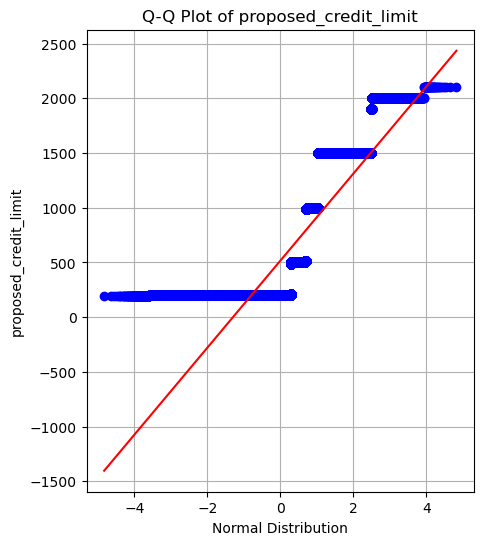

In [133]:
plt.figure(figsize=(5, 6))
sts.probplot(df['proposed_credit_limit'],dist="norm",plot=plt)
plt.title('Q-Q Plot of proposed_credit_limit')
plt.xlabel('Normal Distribution')
plt.ylabel('proposed_credit_limit')
plt.grid()
plt.show()

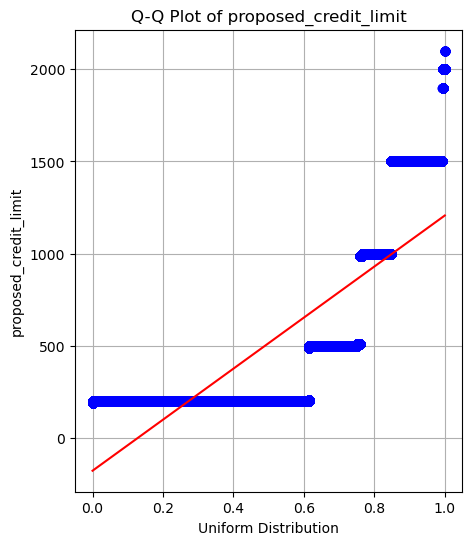

In [170]:
plt.figure(figsize=(5, 6))
sts.probplot(df['proposed_credit_limit'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of proposed_credit_limit')
plt.xlabel('Uniform Distribution')
plt.ylabel('proposed_credit_limit')
plt.grid()
plt.show()

In [150]:
from scipy.stats import kstest

mu = df['proposed_credit_limit'].mean() 
sigma = df['proposed_credit_limit'].std()  
a = df['proposed_credit_limit'].min()
b = df['proposed_credit_limit'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['proposed_credit_limit'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['proposed_credit_limit'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.3554662806715407, P-value: 0.0
Uniform Distribution K-S Statistic: 0.6092550952380953, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "proposed_credit_limit". The visual inspection by histogram says the data is likely normally distributed and slight skewed, box plot suggests the data are right-skewed. 
Further investigation suggests </br>

1. Q-Q plots: The visual inspection of Q-Q plots for normal, shows telltale visualization at both ends of the normal Q-Q plot, Whereas in the uniform there is a slight where data points are not closer.  </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution while both distributions were rejected.  </br>

To bring the data points closer, further investigation needed like logarithmic or square root transformation

In [109]:
#device_distinct_emails_8w

mean_value=df['device_distinct_emails_8w'].mean()
median_value=df['device_distinct_emails_8w'].median()
mode_value=df['device_distinct_emails_8w'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['device_distinct_emails_8w'],mean_propotion)

skewness = round(sts.skew(df['device_distinct_emails_8w'],bias=True),2)
kurtosis = round(sts.kurtosis(df['device_distinct_emails_8w'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['device_distinct_emails_8w'],axis=0, rng=(25,75)),2)
lower_bound = df['device_distinct_emails_8w'].quantile(0.25) - 1.5 * IQR
upper_bound = df['device_distinct_emails_8w'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['device_distinct_emails_8w'] < lower_bound) | (df['device_distinct_emails_8w'] > upper_bound)].shape[0]

print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')

print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:1.018312
Median:1.0
Mode:0    1
Name: device_distinct_emails_8w, dtype: int64
trimmed mean:1.0
skewness:2.43
kurtosis:33.91
IQR:0.0
Outlier:31933


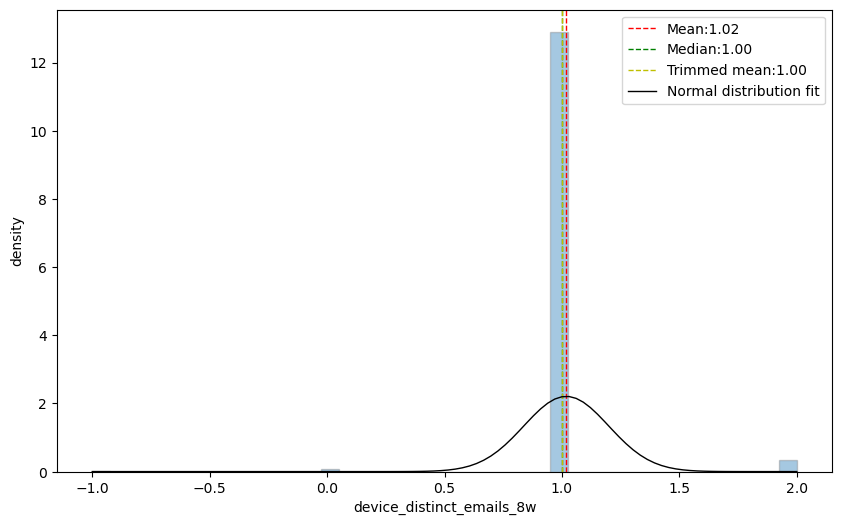

In [111]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['device_distinct_emails_8w'],bins=40,density=True)
plt.hist(df['device_distinct_emails_8w'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['device_distinct_emails_8w'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('device_distinct_emails_8w')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: device_distinct_emails_8w
The mean value is 1.02, suggesting the user has just one distinct email associated with the devices over 8 weeks. </br>
The median value is 1, suggesting users have one or few distinct emails associated with the devices. </br>
The trimmed mean value is 1, suggesting removing the extreme points closer to the mean value indicates anomalies affecting the measures of central tendency. </br>
The IQR value is 0, suggesting that no variability in the middle of the data.</br>

Skewness: 2.43 strong positive skew </br>
Kurtosis: 33.91 very high </br>
Conclusion: : Not normally distributed. The strong positive skew and very high kurtosis indicate many outliers. </br>

<Axes: title={'center': 'Boxplot of device_distinct_emails_8w'}>

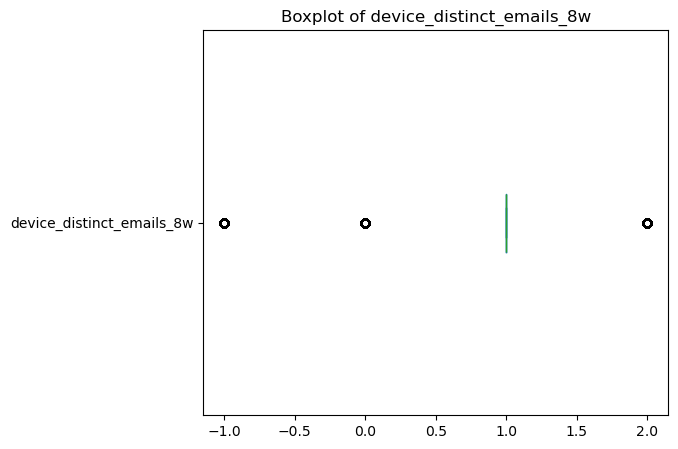

In [123]:
#boxplot for the variable "has_other_cards"
plt.rcParams['figure.figsize']=(6,5)
df['device_distinct_emails_8w'].plot(kind='box', vert=False, title='Boxplot of device_distinct_emails_8w')

<p> The box plot for the variable suggests, On the visulaization we could see only one vertical line due to the median value 1. The data is clustered on the middle value and outliers are present on both sides.</p>

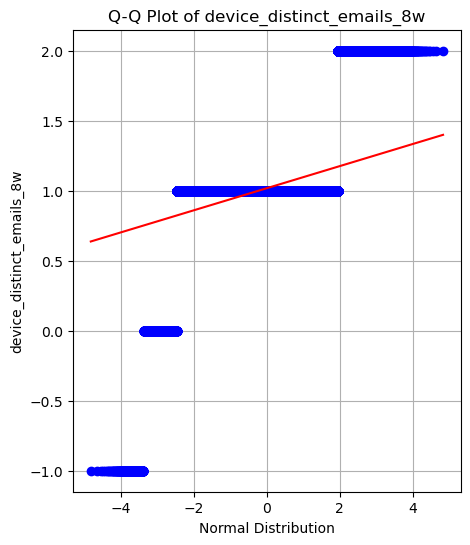

In [177]:
plt.figure(figsize=(5, 6))
sts.probplot(df['device_distinct_emails_8w'],dist="norm",plot=plt)
plt.title('Q-Q Plot of device_distinct_emails_8w')
plt.xlabel('Normal Distribution')
plt.ylabel('device_distinct_emails_8w')
plt.grid()
plt.show()

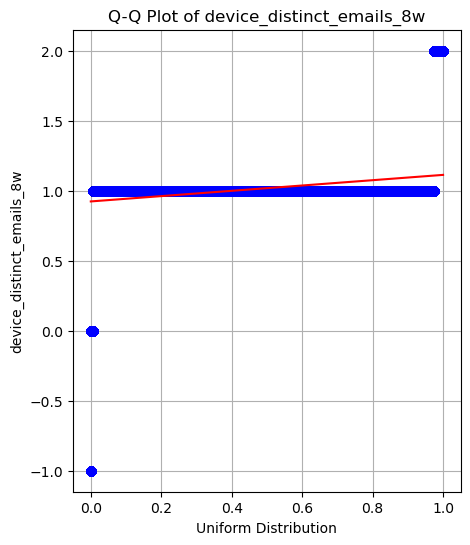

In [179]:
plt.figure(figsize=(5, 6))
sts.probplot(df['device_distinct_emails_8w'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of device_distinct_emails_8w')
plt.xlabel('Uniform Distribution')
plt.ylabel('device_distinct_emails_8w')
plt.grid()
plt.show()

In [156]:
from scipy.stats import kstest

mu = df['device_distinct_emails_8w'].mean() 
sigma = df['device_distinct_emails_8w'].std()  
a = df['device_distinct_emails_8w'].min()
b = df['device_distinct_emails_8w'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['device_distinct_emails_8w'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['device_distinct_emails_8w'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.5150437405101556, P-value: 0.0
Uniform Distribution K-S Statistic: 0.993369, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "device_distinct_emails_8w". The visual inspection by histogram says the data is not normally distributed and strong positively skewed with outliers, box plot suggests the The data is clustered on the middle value and outliers are present on both sides. 
Further investigation suggests </br>

1. Q-Q plots: The visual inspection of Q-Q plots for normal, shows non-normality characteristics, whereas, for the uniform Q-Q plot, the data points not exactly fits on reference line and non-uniform characterstics.  </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution while both distributions were rejected.  </br>

To bring the data points closer, further investigation needed like logarithmic or square root transformation

In [158]:
#income

mean_value=df['income'].mean()
median_value=df['income'].median()
mode_value=df['income'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['income'],mean_propotion)

skewness = round(sts.skew(df['income'],bias=True),2)
kurtosis = round(sts.kurtosis(df['income'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['income'],axis=0, rng=(25,75)),2)
lower_bound = df['income'].quantile(0.25) - 1.5 * IQR
upper_bound = df['income'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)].shape[0]

print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')

print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:0.5626956000000001
Median:0.6000000000000001
Mode:0    0.9
Name: income, dtype: float64
trimmed mean:0.5783695
skewness:-0.39
kurtosis:1.7
IQR:0.5
Outlier:0


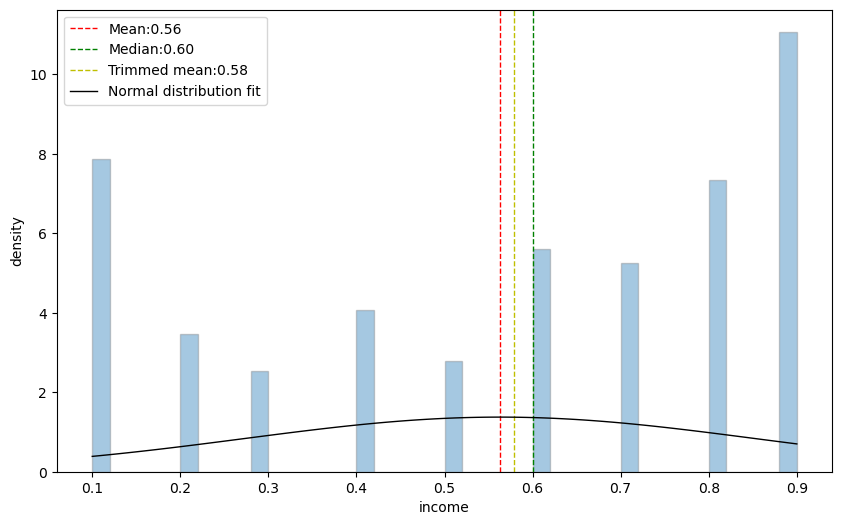

In [160]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['income'],bins=40,density=True)
plt.hist(df['income'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['income'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('income')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: Income
The mean value is 0.56, on average, users earn just over half of a defined income metric </br>
The median value is 0.60, suggesting user income is below the median value.</br>
The trimmed mean value is 0.58, suggesting removing the extreme points will help in a slight increase in the income. </br>
The IQR value is 0.5, suggesting users have a range of incomes, wider than the mean</br>

Skewness: -0.39 slightly negative skew </br>
Kurtosis: 1.7 platykurtic </br>
Conclusion: Likely not normally distributed. The negative skew and low kurtosis suggest fewer extreme values. </br>

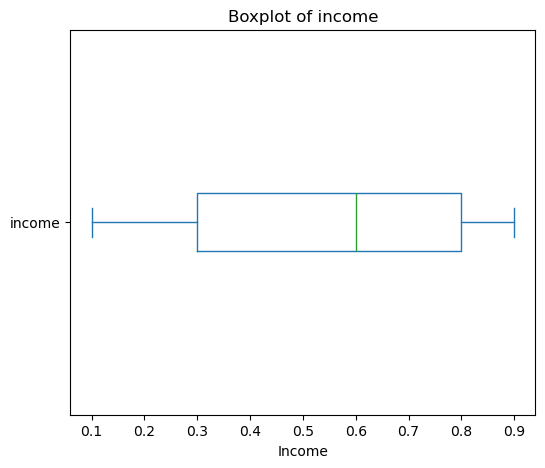

In [163]:
#boxplot for the variable "income"
plt.rcParams['figure.figsize']=(6,5)
df['income'].plot(kind='box', vert=False, title='Boxplot of income')
##for outliers_count in outliers['income']:
  ##  plt.scatter(outlier, 1, color='red', s=100, label='Outliers' 
##if 'Outliers' not in plot.get_legend_handles_labels()[1] else "")
plt.xlabel('Income')
plt.show()

<p> The box plot suggests that the whisker of the box is left-skewed. The distribution is not normal. </p>

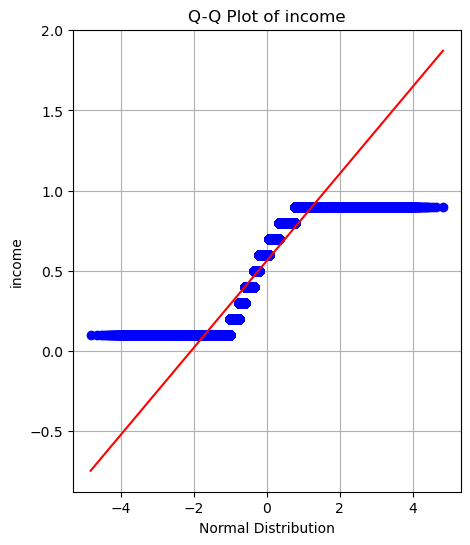

In [165]:
plt.figure(figsize=(5, 6))
sts.probplot(df['income'],dist="norm",plot=plt)
plt.title('Q-Q Plot of income')
plt.xlabel('Normal Distribution')
plt.ylabel('income')
plt.grid()
plt.show()

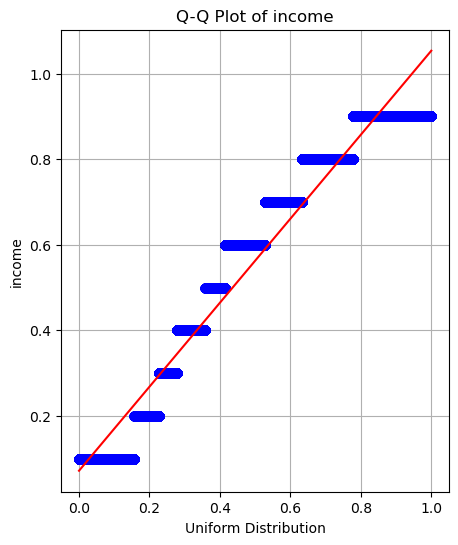

In [184]:
plt.figure(figsize=(5, 6))
sts.probplot(df['income'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of income')
plt.xlabel('Uniform Distribution')
plt.ylabel('income')
plt.grid()
plt.show()

In [171]:
from scipy.stats import kstest

mu = df['income'].mean() 
sigma = df['income'].std()  
a = df['income'].min()
b = df['income'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['income'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['income'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.16119776957914356, P-value: 0.0
Uniform Distribution K-S Statistic: 0.157449, P-value: 0.0


</br>
<b>Conclusion of the visual inspection:</b><p>By observing the histogram and the box plot we identified the variable "income". The visual inspection by histogram says the data is not Likely not normally distributed. The negative skew and low kurtosis suggest fewer extreme values. box plot suggests  that the whisker of the box is left-skewed. The distribution is not normal. 
Further investigation suggests </br>

1. Q-Q plots: The visual inspection of Q-Q plots for normal, shows non-normality characteristics, whereas, for the uniform Q-Q plot, the data points not exactly fits on reference line and non-uniform characterstics.  </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution while both distributions were rejected.  </br>

To bring the data points closer, further investigation needed like logarithmic or square root transformation

In [173]:
mean_value=df['current_address_months_count'].mean()
median_value=df['current_address_months_count'].median()
mode_value=df['current_address_months_count'].mode()
mean_propotion=0.1
trimmed_mean=trim_mean(df['current_address_months_count'],mean_propotion)

skewness = round(sts.skew(df['current_address_months_count'],bias=True),2)
kurtosis = round(sts.kurtosis(df['current_address_months_count'],bias=True,fisher=0),2)
IQR= round(sts.iqr(df['current_address_months_count'],axis=0, rng=(25,75)),2)
lower_bound = df['current_address_months_count'].quantile(0.25) - 1.5 * IQR
upper_bound = df['current_address_months_count'].quantile(0.75) + 1.5 * IQR

# Identify outliers
outliers_count = df[(df['current_address_months_count'] < lower_bound) | (df['current_address_months_count'] > upper_bound)].shape[0]


print(f'Mean:{mean_value}')
print(f'Median:{median_value}')
print(f'Mode:{mode_value}')
print(f'trimmed mean:{trimmed_mean}')


print(f'skewness:{skewness}')
print(f'kurtosis:{kurtosis}')
print(f'IQR:{IQR}')
print(f'Outlier:{outliers_count}')

Mean:86.587867
Median:52.0
Mode:0    6
Name: current_address_months_count, dtype: int64
trimmed mean:71.69929125
skewness:1.39
kurtosis:4.36
IQR:111.0
Outlier:41001


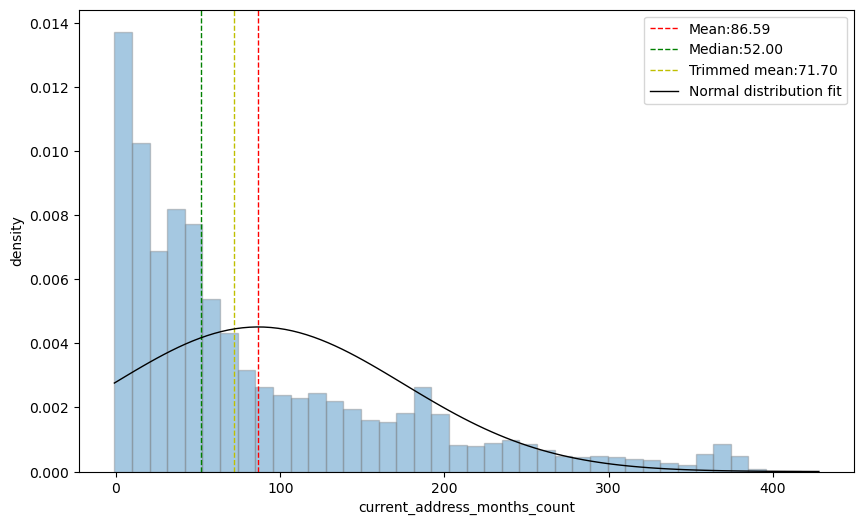

In [175]:
plt.rcParams['figure.figsize']=(10,6)
hist,bin_edges = np.histogram(df['current_address_months_count'],bins=40,density=True)
plt.hist(df['current_address_months_count'],bins=40,edgecolor='grey',alpha=0.4,density=True)

plt.axvline(mean_value,color='r',linewidth=1,linestyle='dashed',label=f'Mean:{mean_value:.2f}')
plt.axvline(median_value,color='g',linestyle='dashed',linewidth=1,label=f'Median:{median_value:.2f}')
plt.axvline(trimmed_mean,color='y',linestyle='dashed',linewidth=1,label=f'Trimmed mean:{trimmed_mean:.2f}')

mn,std= sts.norm.fit(df['current_address_months_count'])

x_bin= np.linspace(bin_edges[0],bin_edges[-1],100)
y_curve=sts.norm.pdf(x_bin,mn,std)

plt.plot(x_bin,y_curve,'k',linewidth=1,label='Normal distribution fit')
plt.xlabel('current_address_months_count')
plt.ylabel('density')
plt.legend()
plt.show()

##### The observation for the variable: current_address_months_count
The mean value is 86.59, on average, users change address nearly 87 times.  </br>
The median value is 52, suggesting the half of the users changed address fewer than 52 times.</br>
The trimmed mean value is 71.70, suggesting removing the extreme points and closer to the mean value suggests the outliers have an impact on the spread of the data. </br>
The IQR value is 111, suggesting IQR is greater than mean and median states that indicating wide range of variability. </br>

Skewness: 1.39 moderate positive skew </br>
Kurtosis: 4.36 leptokurtic </br>
Conclusion: Not normally distributed. The positive skew and high kurtosis suggest outliers are present </br>

<Axes: title={'center': 'Boxplot of current_address_months_count'}>

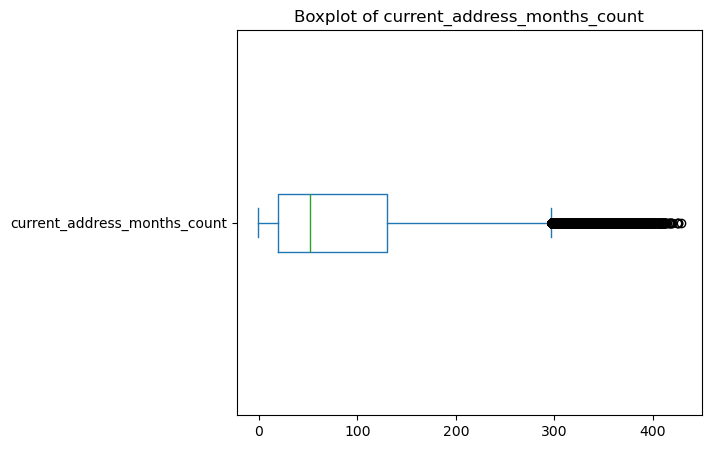

In [237]:
#prev_address_months_count 
plt.rcParams['figure.figsize']=(6,5)
df['current_address_months_count'].plot(kind='box', vert=False, title='Boxplot of current_address_months_count')

<p> The box plot of the variable suggests that the whisker of the box plot is larger on the right hand side and it says the distribution is right skewed.</p>

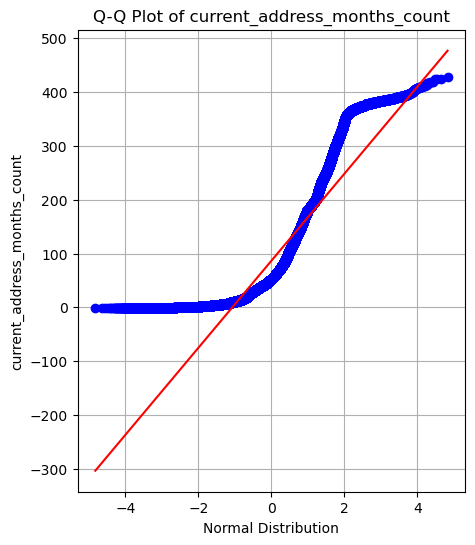

In [189]:
plt.figure(figsize=(5, 6))
sts.probplot(df['current_address_months_count'],dist="norm",plot=plt)
plt.title('Q-Q Plot of current_address_months_count')
plt.xlabel('Normal Distribution')
plt.ylabel('current_address_months_count')
plt.grid()
plt.show()

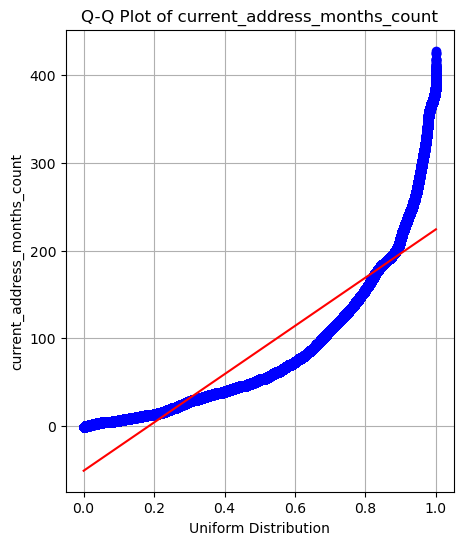

In [196]:
plt.figure(figsize=(5, 6))
sts.probplot(df['current_address_months_count'],dist="uniform",plot=plt)
plt.title('Q-Q Plot of current_address_months_count')
plt.xlabel('Uniform Distribution')
plt.ylabel('current_address_months_count')
plt.grid()
plt.show()

In [235]:
from scipy.stats import kstest

mu = df['current_address_months_count'].mean() 
sigma = df['current_address_months_count'].std()  
a = df['current_address_months_count'].min()
b = df['current_address_months_count'].max()

# Perform the K-S test
ks_statistic_normal, p_value_normal = kstest(df['current_address_months_count'], 'norm', args=(mu, sigma))
ks_statistic_uniform, p_value_uniform = kstest(df['current_address_months_count'], 'uniform', args=(a, b))

print(f"Normal Distribution K-S Statistic: {ks_statistic_normal}, P-value: {p_value_normal}")
print(f"Uniform Distribution K-S Statistic: {ks_statistic_uniform}, P-value: {p_value_uniform}")

Normal Distribution K-S Statistic: 0.16483054912533845, P-value: 0.0
Uniform Distribution K-S Statistic: 0.44577392523364484, P-value: 0.0


</br>
<b> Conclusion of the visual inspection:</b><p>By observing the histogram, it says data is not normally distributed. The positive skew and high kurtosis suggest outliers are present and the box plot of the variable suggests that the whisker of the box plot is larger on the right hand side and it says the distribution is right skewed. 
Further investigation suggests </br>

1. Q-Q plots: The visual inspection of Q-Q plots for normal, shows non-normality characteristics, whereas, for the uniform Q-Q plot, the data points not exactly fits on reference line and non-uniform characterstics.  </br>
2. KS Test: The KS score suggests, that the p-value is < 0.05 for both (normal and uniform) suggesting data does not follow either distribution while both distributions were rejected.  </br>

To bring the data points closer, further investigation needed like logarithmic or square root transformation

### <b> A brief summary of normality check </b>

<b>Normality check : </b>
</br>
1.Velocity_6h: Positive skewness; significant deviations in Q-Q plot; K-S test p-value = 0.0 (rejects normality). </br>
2.Velocity_24h: Slightly positively skewed; minor deviations in Q-Q plot; K-S test p-value = 0.0 (rejects normality).</br>
3.Velocity_4w: Nearly normal with slight skewness; close fit in Q-Q plot; K-S test p-value = 0.0 (rejects normality).</br>
4. Name_Email_Similarity: Likely normal; symmetric; Q-Q plot suggests a good fit for uniform distribution, but normality is questionable. </br>
5. Session_Length_in_Minutes: Right skew; Q-Q plot shows significant deviations; K-S test p-value = 0.0 (rejects normality); closer to uniform distribution. </br>
</br>
6.Credit_Risk_Score: Slightly right skewed; Q-Q plot indicates deviations from normal; K-S test p-value = 0.0 (rejects both distributions). </br>
7. Proposed_Credit_Limit: Slight right skew; Q-Q plot shows deviations; K-S test p-value = 0.0 (rejects both distributions).</br>
8. Device_Distinct_Emails_8w: Strong positive skew; Q-Q plot shows deviations; K-S test p-value = 0.0 (rejects both distributions).</br>
9.Income: Negative skew; Q-Q plot shows deviations; K-S test p-value = 0.0 (rejects both distributions).</br>
10.Proposed_Credit_Limit: Slight right skew; Q-Q plot shows deviations; K-S test p-value = 0.0 (rejects both distributions)</br>


### <b> Further investigation </b>
<p>The transformation technique are used to improve the fit and data points brings closer to improve the skewness.</p>

<p>The best transformation techniques used to improve the skewness and variation, we use several methods of transformation. Based on the data spread, transformation techniques are picked. </p>
</br>
1.Velocity_6h: Cube root transformation </br>
2. Velocity_24h: Cube root Transformation</br>
3. Velocity_4w: Square Root Transformation</br>
4. Session_Length_in_Minutes: Log Transformation</br>
5. Income: Square Root Transformation</br>
6. Credit_Risk_Score: Log Transformation</br>
7. current_address_months_count: Log Transformation</br>


In [300]:
df_new.head(5)

,income,name_email_similarity,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,session_length_in_minutes,current_address_months_count,fraud_bool
0,0.3,0.986506,13096.035018,7850.955007,6742.080561,163,16.224843,25,0
1,0.8,0.617426,9223.283431,5745.251481,5941.664859,154,3.363854,89,0
2,0.8,0.996707,4471.472149,5471.988958,5992.555113,89,22.730559,14,0
3,0.6,0.475100,14431.993621,6755.344479,5970.336831,90,15.215816,14,0
4,0.9,0.842307,7601.511579,5124.046930,5940.734212,91,3.743048,29,0


In [302]:
df_transformed = df_new.copy()
df_transformed

,income,name_email_similarity,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,session_length_in_minutes,current_address_months_count,fraud_bool
0,0.3,0.986506,13096.035018,7850.955007,6742.080561,163,16.224843,25,0
1,0.8,0.617426,9223.283431,5745.251481,5941.664859,154,3.363854,89,0
2,0.8,0.996707,4471.472149,5471.988958,5992.555113,89,22.730559,14,0
3,0.6,0.475100,14431.993621,6755.344479,5970.336831,90,15.215816,14,0
4,0.9,0.842307,7601.511579,5124.046930,5940.734212,91,3.743048,29,0
...,...,...,...,...,...,...,...,...,...
999995,0.8,0.124690,6732.602414,3010.048099,3095.754245,305,16.967770,143,0
999996,0.9,0.824544,1574.293294,2716.495767,4286.089050,235,1.504109,193,0
999997,0.8,0.140891,1258.864938,3601.322892,3103.891664,195,16.068595,202,0
999998,0.9,0.002480,7048.137128,6521.395012,3068.265084,148,1.378683,3,0


In [320]:
df_transformed['velocity_6h_cbrt'] = np.cbrt(df_new['velocity_6h'])

In [322]:
print(df_transformed[['velocity_6h', 'velocity_6h_cbrt']].head())

    velocity_6h  velocity_6h_cbrt
0  13096.035018         23.571105
1   9223.283431         20.971453
2   4471.472149         16.474675
3  14431.993621         24.346812
4   7601.511579         19.662255


In [324]:
print(df_transformed)

        income  name_email_similarity   velocity_6h  velocity_24h  \
0          0.3               0.986506  13096.035018   7850.955007   
1          0.8               0.617426   9223.283431   5745.251481   
2          0.8               0.996707   4471.472149   5471.988958   
3          0.6               0.475100  14431.993621   6755.344479   
4          0.9               0.842307   7601.511579   5124.046930   
...        ...                    ...           ...           ...   
999995     0.8               0.124690   6732.602414   3010.048099   
999996     0.9               0.824544   1574.293294   2716.495767   
999997     0.8               0.140891   1258.864938   3601.322892   
999998     0.9               0.002480   7048.137128   6521.395012   
999999     0.6               0.993391   3737.076479   3135.788094   

        velocity_4w  credit_risk_score  session_length_in_minutes  \
0       6742.080561                163                  16.224843   
1       5941.664859              

In [435]:
# Create a new DataFrame to hold only transformed data
df_transformed = pd.DataFrame()

# Apply Cube Root Transformation and assign it directly
df_transformed['velocity_6h_cbrt'] = np.cbrt(df_new['velocity_6h'])
df_transformed['velocity_24h_cbrt'] = np.cbrt(df_new['velocity_24h'])
# Apply square root transformation
df_transformed['velocity_4w_sqrt'] = np.sqrt(df_new['velocity_4w'])
df_transformed['session_length_in_minutes_log'] = np.log(df_new['session_length_in_minutes'])
df_transformed['income_sqrt']= np.sqrt(df_new['income'])
df_transformed['credit_risk_score_cbrt']=np.cbrt(df_new['credit_risk_score'])
df_transformed['current_address_months_count_cbrt']= np.cbrt(df_new['current_address_months_count'])

# Display results
print(df_transformed)

        velocity_6h_cbrt  velocity_24h_cbrt  velocity_4w_sqrt  \
0              23.571105          19.875016         82.110173   
1              20.971453          17.910306         77.082195   
2              16.474675          17.621724         77.411595   
3              24.346812          18.903802         77.267955   
4              19.662255          17.240017         77.076159   
...                  ...                ...               ...   
999995         18.882565          14.438580         55.639503   
999996         11.633093          13.953067         65.468229   
999997         10.797579          15.328066         55.712581   
999998         19.173061          18.683010         55.391923   
999999         15.518295          14.636893         55.235888   

        session_length_in_minutes_log  income_sqrt  credit_risk_score_cbrt  \
0                            2.786544     0.547723                5.462556   
1                            1.213087     0.894427             

C:\Users\Sruthi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [448]:
skewness = df_transformed[['velocity_6h_cbrt','velocity_24h_cbrt','velocity_4w_sqrt', 'session_length_in_minutes_log','income_sqrt','credit_risk_score_cbrt', 'current_address_months_count_cbrt']].skew()
print(skewness)

velocity_6h_cbrt                    -0.394699
velocity_24h_cbrt                   -0.132384
velocity_4w_sqrt                    -0.299454
session_length_in_minutes_log       -0.018208
income_sqrt                         -0.681251
credit_risk_score_cbrt              -3.142471
current_address_months_count_cbrt    0.010590
dtype: float64


<p>Negative Skewness: Values such as velocity_6h_cbrt, velocity_24h_cbrt, velocity_4w_sqrt, income_sqrt, and credit_risk_score_cbrt show negative skewness, indicating that these distributions have longer left tails. This suggests that a few low values are pulling the mean.

Near Zero Skewness: The values for session_length_in_minutes_log and current_address_months_count_cbrt are close to zero, indicating that these distributions are approximately symmetric or normal distribution. </p>

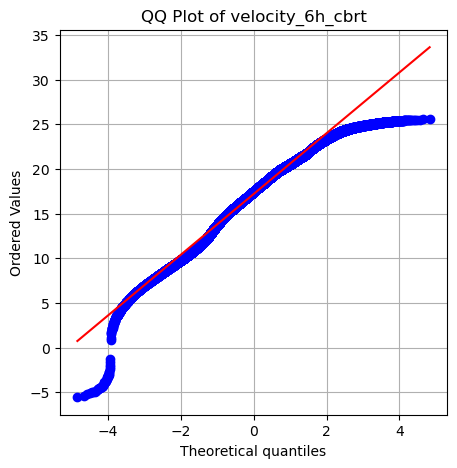

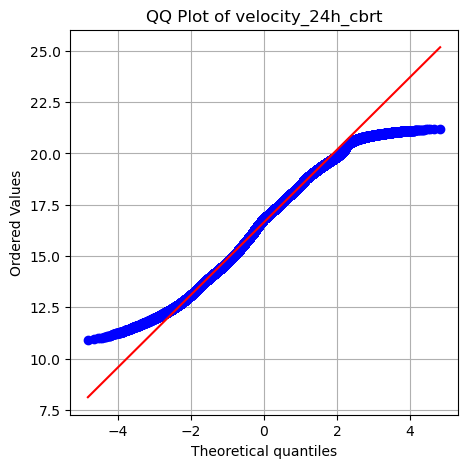

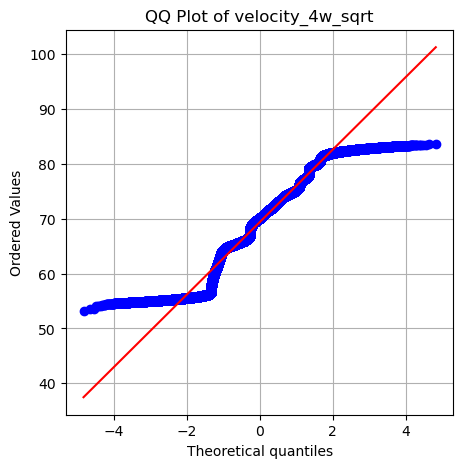

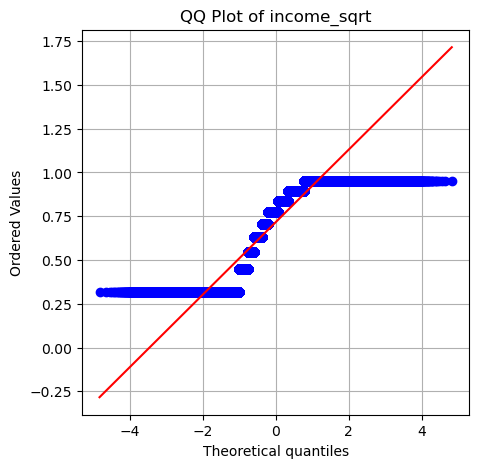

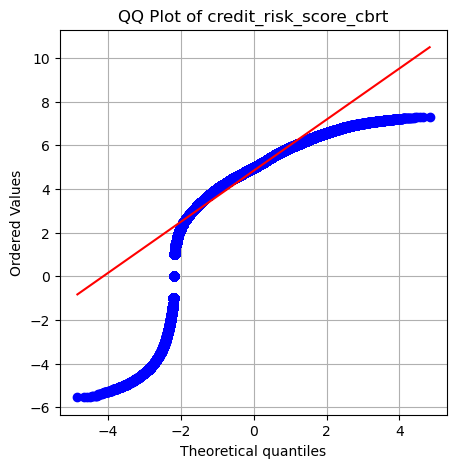

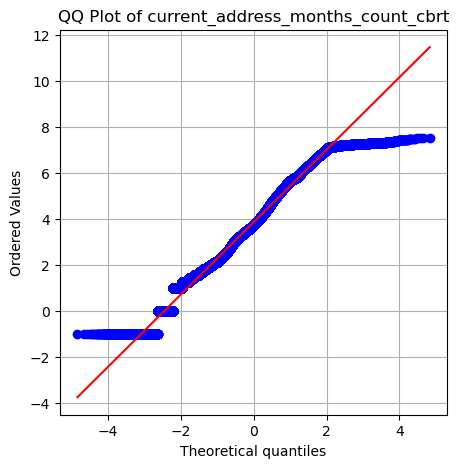

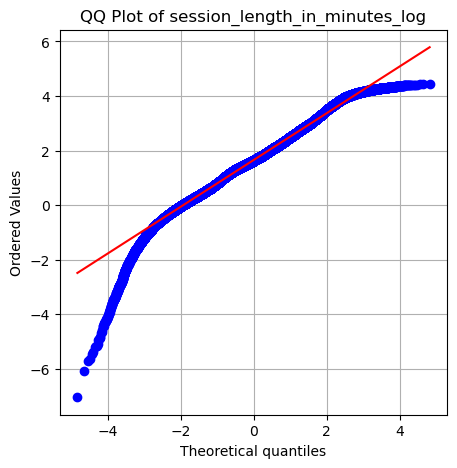

In [446]:
def qq_plot(df, column_name):
    plt.figure(figsize=(5, 5))
    sts.probplot(df[column_name].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column_name}')
    plt.grid()
    plt.show()

# Visualize using QQ plot
qq_plot(df_transformed, 'velocity_6h_cbrt')
qq_plot(df_transformed, 'velocity_24h_cbrt')
qq_plot(df_transformed, 'velocity_4w_sqrt')
qq_plot(df_transformed, 'income_sqrt')
qq_plot(df_transformed, 'credit_risk_score_cbrt')
qq_plot(df_transformed, 'current_address_months_count_cbrt')
qq_plot(df_transformed, 'session_length_in_minutes_log')


In [162]:
df_new.corr()

,income,name_email_similarity,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,proposed_credit_limit,device_distinct_emails_8w,device_fraud_count,has_other_cards,session_length_in_minutes,current_address_months_count
income,1.000000,-0.038519,-0.096431,-0.101269,-0.106333,0.171447,0.108868,-0.009992,NaN,0.086861,-0.055430,-0.036985
name_email_similarity,-0.038519,1.000000,0.024881,0.035221,0.039968,0.049126,0.073159,-0.017804,NaN,0.011021,0.005998,0.050305
velocity_6h,-0.096431,0.024881,1.000000,0.464003,0.400254,-0.145254,-0.025005,0.030030,NaN,-0.007049,0.054491,0.027508
velocity_24h,-0.101269,0.035221,0.464003,1.000000,0.539115,-0.146770,0.017725,0.034981,NaN,-0.030688,0.066875,0.018753
velocity_4w,-0.106333,0.039968,0.400254,0.539115,1.000000,-0.168766,0.052440,0.042320,NaN,-0.048343,0.079005,0.026172
credit_risk_score,0.171447,0.049126,-0.145254,-0.146770,-0.168766,1.000000,0.606141,-0.040987,NaN,0.139486,-0.034430,0.094976
proposed_credit_limit,0.108868,0.073159,-0.025005,0.017725,0.052440,0.606141,1.000000,-0.017452,NaN,0.096254,-0.000165,0.130594
device_distinct_emails_8w,-0.009992,-0.017804,0.030030,0.034981,0.042320,-0.040987,-0.017452,1.000000,NaN,-0.028367,0.077473,-0.000760
device_fraud_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_other_cards,0.086861,0.011021,-0.007049,-0.030688,-0.048343,0.139486,0.096254,-0.028367,NaN,1.000000,-0.092790,0.060732
